# Data Pre-Processing of Diabetes Dataset

In [1]:
import pandas as pd
file_path = "https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/diabetes.csv"
df = pd.read_csv(file_path)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Feature Decription:
- ID  -  Unique Identifier
- NO_pation  -  Patient Number
- Gender
- AGE 
- Urea  -  Blood Urea level (Kidney function)
- Cr  - Creatine level (Kidney function)
- HbA1c  -  indicating long-term blood sugar control
- Chol  -  cholesterol level
- TG  -  Triglycerides level (Fat in the Blood)
- HDL  -  High-Density Lipoprotein cholesterol
- LDL  - Low-Density Lipoprotein cholesterol
- VLDL  -  Very Low-Density Lipoprotein cholesterol
- BMI  -  Body Mass Index, calculated as weight/height (body fat)
- CLASS  -  yes / no (disease status)


In [2]:
df.shape

(1009, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1006 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [4]:
df.isna().sum()

ID           0
No_Pation    0
Gender       3
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

- There are a few missing values here

# Pre-Processing Steps:-

## 1.Data Cleaning:

# Step 1.1.
- Rename Columns: Update column names such as 'ID' to 'Visit_ID' and 'No_Pation' to 'Patient_ID' to make them more descriptive and clear. 

In [5]:
df.rename(columns={"ID":"Visit ID","No_Pation": "Patient_ID"},inplace=True)
df.head()

,Visit ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Step 1.2:
- Check Unique Values in Categorical Columns: Identify the unique values in categorical columns:

In [6]:
print(df["Gender"].unique())
df["CLASS"].unique()

['F' 'M' nan 'f']


array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

- In "Gender" column There are 3 missing values here (replace with mode value), And Change "f" into Capitalised format
- In "CLASS" Column remove Unneccessary Space in the value.

In [7]:
df["Gender"].mode()[0] 
df["Gender"]= df["Gender"].fillna(df["Gender"].mode()[0])
df["Gender"]=df["Gender"].replace("f","F") # or use str.upper() to conver lowercase to upper
df["CLASS"]=df["CLASS"].str.strip() # remove Unneccessary Space
df.head()

,Visit ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
print(df["Gender"].unique())
df["CLASS"].unique()  #Cross Validate the Column

['F' 'M']


array(['N', 'P', 'Y'], dtype=object)

# Step 1.3.	
- Statistical Summary of Numerical Columns

In [9]:
Numerical_col = ["AGE","Urea","Cr","HbA1c","Chol","TG","HDL","LDL","VLDL","BMI"]
for col in Numerical_col:
    print(f"Statistical Summary of {col} :")
    print(f"{col} Mean Value : {df[col].mean()}")
    print(f"{col} Median Value : {df[col].median()}")
    print(f"{col} Min Value : {df[col].min()}")
    print(f"{col} Max Value : {df[col].max()}")
    print(f"{col} Standard Deviation Value : {df[col].std()}\n")

Statistical Summary of AGE :
AGE Mean Value : 53.59623015873016
AGE Median Value : 55.0
AGE Min Value : 25.0
AGE Max Value : 79.0
AGE Standard Deviation Value : 8.74388228038728

Statistical Summary of Urea :
Urea Mean Value : 5.132979166666666
Urea Median Value : 4.6
Urea Min Value : 0.5
Urea Max Value : 38.9
Urea Standard Deviation Value : 2.930873034668184

Statistical Summary of Cr :
Cr Mean Value : 68.93843098311817
Cr Median Value : 60.0
Cr Min Value : 6.0
Cr Max Value : 800.0
Cr Standard Deviation Value : 59.81567264984684

Statistical Summary of HbA1c :
HbA1c Mean Value : 8.281371769383698
HbA1c Median Value : 8.0
HbA1c Min Value : 0.9
HbA1c Max Value : 16.0
HbA1c Standard Deviation Value : 2.5348607284023075

Statistical Summary of Chol :
Chol Mean Value : 4.862482621648462
Chol Median Value : 4.8
Chol Min Value : 0.0
Chol Max Value : 10.3
Chol Standard Deviation Value : 1.298665392866884

Statistical Summary of TG :
TG Mean Value : 2.3467825223435947
TG Median Value : 2.0
TG 

### Interpretation
- **Cr and Urea - Shows significant different between min value and Max value in this feature, its indicating there are outliers here.**
- **BMI - The mean BMI is 29.57 , that mean there are more individuals might be overweignt or obese.**
- **Other features - All other Columns have difference in their Mean and sdandard value, but mean and median value sightly vary that means its indicating Shiglty Skew distribution** 

# Step 1.4:
- Box Plot of Numerical Columns: 

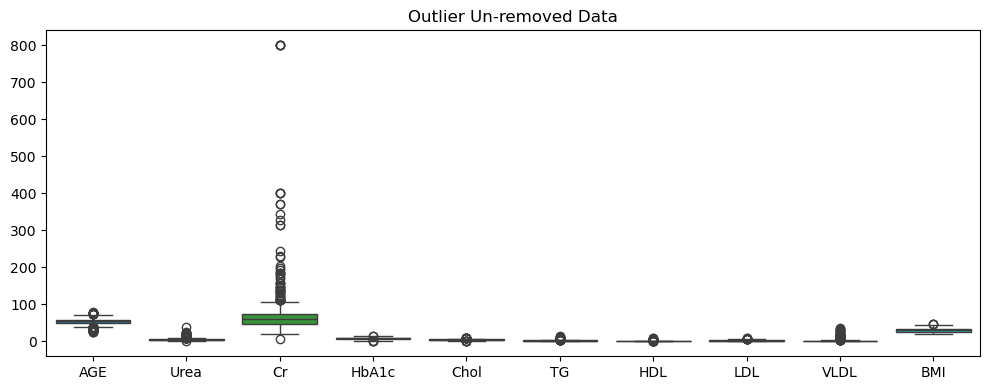

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(data=df[Numerical_col])
plt.title("Outlier Un-removed Data")
plt.tight_layout()
plt.show()

# Step 1.5:
 - Identify Missing (Null) Values: 

In [11]:
df.isna().sum().reset_index()

,index,0
0,Visit ID,0
1,Patient_ID,0
2,Gender,0
3,AGE,1
4,Urea,1
5,Cr,2
6,HbA1c,3
7,Chol,2
8,TG,2
9,HDL,1


# Step 1.6:
 - Impute Missing Values: 

In [12]:
# Median Values: Age urea Cr HbA1c
Median_col=["AGE","Urea","Cr","HbA1c"]
for col in Median_col:
    df[col]=df[col].fillna(df[col].median())

# Mean values : 
Mean_col = ["Chol","TG","HDL","LDL","VLDL"]
for col in Mean_col:
    df[col]=df[col].fillna(df[col].mean().round(1))

df.isna().sum()

Visit ID      0
Patient_ID    0
Gender        0
AGE           0
Urea          0
Cr            0
HbA1c         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64

# Step 1.7.	
 - Outlier Handling: 

### a. Retaining Outliers in AGE, HbA1c, and BMI Columns
**AGE**
- Age can vary significantly among patients
- Removing outliers can eliminate important patterns in diseases affecting very young or very old individuals.

**HbA1c**  
- HbA1c measures long-term blood sugar levels and is critical for diagnosing diabetes
- Removing these values may hide high-risk patients who need special medical attention.

**BMI**
- BMI outliers help identify obesity-related conditions
- Healthcare professionals often study extreme BMI cases to understand health risks better.

### b. Filter Outliers: 
- using threshold value to filter outliers for Cr and Urea colunms

In [13]:
Cr_threshold = df["Cr"].quantile(0.995)
print(Cr_threshold)
Urea_threshold = df["Urea"].quantile(0.999)
Urea_threshold

401.0


26.38080000000018

In [14]:
# filtering Outliers
df1 = df[( df["Cr"]<=Cr_threshold ) & ( df["Urea"]<=Urea_threshold )]
df1.head()

,Visit ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


### c. Remove Extreme Outliers: 
 - Using IQR method to removing extreme Outliers for (LDL, VLDL, HDL, TG, Chol)

Calculate IQR method for Chol
IQR for Chol : 1.5999999999999996
Lower_bound for Chol : 1.6000000000000005
Upper_bound for Chol : 7.999999999999999

Calculate IQR method for TG
IQR for TG : 1.4
Lower_bound for TG : -0.5999999999999996
Upper_bound for TG : 5.0

Calculate IQR method for HDL
IQR for HDL : 0.4
Lower_bound for HDL : 0.29999999999999993
Upper_bound for HDL : 1.9000000000000001

Calculate IQR method for LDL
IQR for LDL : 1.4999999999999998
Lower_bound for LDL : -0.4499999999999995
Upper_bound for LDL : 5.549999999999999

Calculate IQR method for VLDL
IQR for VLDL : 0.8
Lower_bound for VLDL : -0.5000000000000002
Upper_bound for VLDL : 2.7



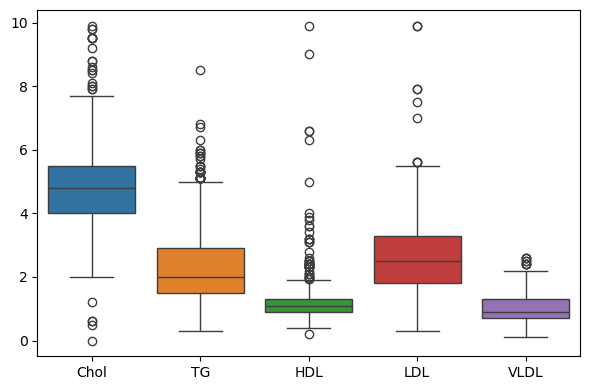

In [15]:
numeric_col = ["Chol","TG","HDL","LDL","VLDL"]
for col in numeric_col:
    print(f"Calculate IQR method for {col}")
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    print(f"IQR for {col} : {IQR}")
    lower_bound = Q1-1.5*IQR
    Upper_bound = Q3+1.5*IQR
    print(f"Lower_bound for {col} : {lower_bound}")
    print(f"Upper_bound for {col} : {Upper_bound}\n")
    df1 = df[ (df[col]>=lower_bound) & (df[col]<=Upper_bound)]

plt.figure(figsize=(6,4))
sns.boxplot(df1[numeric_col])
plt.tight_layout()
plt.show()

**We removed Exteme outliers using IQR method.but there are still some outlier there.but removing all outliers might remove important patient cases.**

## Treating Skewness using Transformations method

In [16]:
df_skew= df1[numeric_col].skew()
print(df_skew)

# Reduce Skewness using SQRT transformation
import numpy as np
skewed_data=df1[numeric_col]
skewed_data = pd.DataFrame(np.sqrt(skewed_data))
sqrt_Skew=skewed_data.skew()
sqrt_Skew

Chol    0.474344
TG      1.181521
HDL     6.164733
LDL     1.164257
VLDL    0.765497
dtype: float64


Chol   -0.586589
TG      0.529864
HDL     2.944268
LDL     0.238427
VLDL    0.216483
dtype: float64

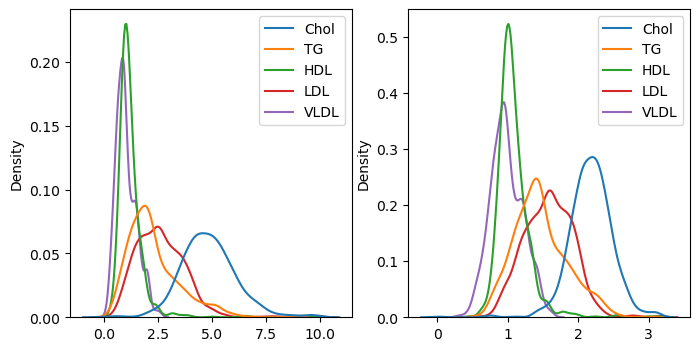

In [17]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df1[numeric_col])
plt.subplot(1,2,2)
sns.kdeplot(skewed_data)
plt.show()

# Step 1.8:
  - Check for Duplicates

In [18]:
df[df.duplicated()]

,Visit ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
999,188,454316,F,75.0,10.3,113.0,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
1000,189,454316,M,58.0,4.0,55.0,7.9,4.9,2.0,1.2,1.4,1.1,35.0,Y
1005,195,4543,F,55.0,4.1,34.0,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
1006,249,48822,M,55.0,4.2,57.0,8.9,5.3,3.1,0.7,3.3,1.4,27.0,Y
1007,88,21747,M,41.0,3.8,48.0,4.3,3.2,4.5,1.3,1.8,1.1,21.0,N
1008,62,46059,M,55.0,7.0,56.0,9.1,3.7,1.9,0.7,2.3,0.9,27.0,Y


In [19]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# 2.Data Transformation:

# Step 2.1:
- **Feature Engineering:** Apply Label Encoding or One-Hot Encoding to the categorical column Gender to convert it into numeric format for model-building purposes.

- There are only two values in Gender colunms so use Labelencoding for this dataframe. if multiple value in categery colunms use One_Hot encoding.

In [20]:
# catagerical Data Transformation
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df["Encoding_Gender"]= labelencoder.fit_transform(df["Gender"]) 
print(df["Encoding_Gender"].unique()) # cross check
df.head()

[0 1]


,Visit ID,Patient_ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Encoding_Gender
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,1
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,1


# Step 2.2:
- **Feature Scaling:** Standardize or normalize the numerical columns that have varying scales (e.g., Patients, AGE, BMI, Cr) to ensure consistent contribution in subsequent analyses. Justify the scaling method used (standardization vs. normalization).

In [21]:
# Normalization Scaling (There are more outlier here so use Standardisation)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Nscaler_df= pd.DataFrame(scaler.fit_transform(df[["Patient_ID","AGE","Cr","BMI"]]))
Nscaler_df.head()

,0,1,2,3
0,0.000237,0.462963,0.050378,0.173913
1,0.000452,0.018519,0.070529,0.139130
2,0.000634,0.462963,0.050378,0.173913
3,0.001160,0.462963,0.050378,0.173913
4,0.000452,0.148148,0.050378,0.069565


### In this Case use Standardisation Scaling. [When data follows Normal Distrubution or Data contains Outliers]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sscaler_df=pd.DataFrame(scaler.fit_transform(df[["Patient_ID","AGE","Cr","BMI"]]))
Sscaler_df

,0,1,2,3
0,-0.075391,-0.410355,-0.383669,-1.125858
1,-0.070576,-3.161138,-0.116433,-1.327788
2,-0.066500,-0.410355,-0.383669,-1.125858
3,-0.054739,-0.410355,-0.383669,-1.125858
4,-0.070575,-2.358826,-0.383669,-1.731648
...,...,...,...,...
998,0.053933,0.735805,-0.149837,-0.520069
999,0.053933,0.162725,-0.116433,0.105914
1000,0.053933,0.162725,0.317825,0.085721
1001,0.053933,0.965037,0.217612,0.105914
